In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\91951\\OneDrive\\Desktop\\ALL DEEP LEARNING PROJECTS FOR RESUME\\08-Linear-Regression-Models\\Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X=df.drop('sales',axis=1)

In [5]:
Y=df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
poly_conv=PolynomialFeatures(degree=2,include_bias=False)

In [8]:
poly_conv.fit(X)

PolynomialFeatures(include_bias=False)

In [9]:
poly_feat=poly_conv.transform(X)

In [10]:
poly_feat.shape

(200, 9)

In [11]:
X.shape

(200, 3)

In [12]:
poly_conv.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [13]:
#from sklearn.Mode_Selection import train_
from sklearn.model_selection import train_test_split


In [14]:
x_train,x_test,y_train,y_test=train_test_split(poly_feat,Y,test_size=0.3,random_state=101)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
my_model=LinearRegression()

In [17]:
my_model.fit(x_train,y_train)

LinearRegression()

In [18]:
predict=my_model.predict(x_test)

In [19]:
my_model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [21]:
MAE=mean_absolute_error(y_test,predict)

In [22]:
MSE=mean_squared_error(y_test,predict)

In [23]:
RMSE=np.sqrt(MSE)

In [24]:
MAE

0.48967980448037024

In [25]:
MSE

0.44175055104036487

In [26]:
RMSE

0.6646431757269196

In [27]:
train_RMSE=[]
Test_RMSE=[]
for d in range(1,10):
    poly_conv=PolynomialFeatures(degree=d,include_bias=False)
    poly_feat=poly_conv.fit_transform(X)
    x_train,x_test,y_train,y_test=train_test_split(poly_feat,Y,test_size=0.3,random_state=(101))
    my_model=LinearRegression()
    my_model.fit(x_train,y_train)
    predict_train=my_model.predict(x_train)
    predict_test=my_model.predict(x_test)
    RMSE_train=np.sqrt(mean_squared_error(predict_train,y_train))
    RMSE_test=np.sqrt(mean_squared_error( predict_test,y_test))
    train_RMSE.append(RMSE_train)
    Test_RMSE.append(RMSE_test)

In [28]:
train_RMSE

[1.734594124329376,
 0.5879574085292231,
 0.4339344356902067,
 0.351708368839935,
 0.25093429520293764,
 0.1993333283427367,
 5.421421599418673,
 0.14237972100735366,
 0.16675080562653669]

In [29]:
Test_RMSE

[1.5161519375993877,
 0.6646431757269196,
 0.5803286825231458,
 0.5077742624232122,
 2.5758247603436017,
 4.490868529264996,
 1381.404235838589,
 4449.568197230342,
 95893.02658131701]

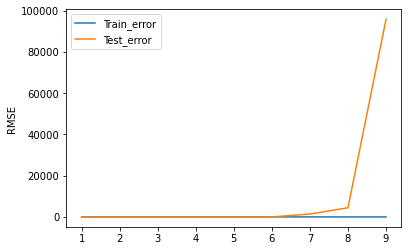

In [30]:
plt.plot(range(1,10),train_RMSE,label="Train_error") # tends to overfitting
plt.plot(range(1,10),Test_RMSE,label="Test_error")
plt.ylabel("RMSE")
#plt.xlabel("degrre of poly")
plt.legend()

In [31]:
fina_conv=PolynomialFeatures(degree=3,include_bias=False)


In [32]:
X=df.drop('sales',axis=1)

In [33]:
fina_conv.fit_transform(X).shape

(200, 19)

In [34]:
final_model=LinearRegression()
final_model.fit(fina_conv.fit_transform(X),Y)


LinearRegression()

In [35]:
from joblib import dump,load


In [36]:
dump(fina_conv,"final_conv.joblib")

['final_conv.joblib']

In [37]:
dump(final_model,"final_model.joblib")

['final_model.joblib']

In [38]:
con=load("final_conv.joblib")
mdl=load('final_model.joblib')

In [39]:
campaign=[[122,22,19]]


In [40]:
xx=con.fit_transform(campaign)

In [41]:
xx.shape

(1, 19)

In [42]:
mdl.predict(xx)

array([13.64665668])